In [1]:
#loading required python modules for the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading in the data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
#checking information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [4]:
# check statistics of data
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [5]:
#checking total dataset
data.shape

(729322, 11)

In [6]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [8]:
#checking for missing values in the dataset
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Fortunately, They are no missing values in the dataset. We can move on to explore the data.

In [9]:
#checking uniqueness of data to be able to identify suspected categorical columns
data['vendor_id'].unique(), data['store_and_fwd_flag'].unique(), data['passenger_count'].unique()

(array([2, 1], dtype=int64),
 array(['N', 'Y'], dtype=object),
 array([1, 2, 6, 3, 4, 5, 0, 7, 9], dtype=int64))

I found that the vendor_id columns has two unique values(1,2)
The store_and_fwd_flag has two also ('N', 'Y')
The passenger_count has 9 unique characteristics (1, 2, 6, 3, 4, 5, 0, 7, 9), I am however skepital that passenger count can be zero.

In [10]:
(data['passenger_count'] == 0).sum()

33

Thought that was an error, hence, the above, but it shows there are 33 of such entries, wow! what could this be? A cancelled trip? I cannot think of any other reason right now, maybe the business will be in the best position to explain this. Anyway, let's continue.

In [11]:
#checking for uniqueness in all columns just in case there are other hidden categorical columns.
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [12]:
#converting to categorical data
data['vendor_id'] = data['vendor_id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [13]:
#let's inspect the data once more to have and idea characteristics of each column.
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


The data has both pick up date and drop off time. We can get some additional information from these two fields, like weekday, hour and month. First, I have to convert to datetime format using pandas since I already found that the two fields are originally of the object datatype.

In [14]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [15]:
#extracting helpful information for pickup time
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_weekday'] = data['pickup_datetime'].dt.day_name()
data['pickup_month'] = data['pickup_datetime'].dt.month_name(locale = 'English')

In [16]:
#inspecting the uniqueness of each data and they all make sense except for month
data['pickup_hour'].unique(), data['pickup_weekday'].unique(), data['pickup_month'].unique()

(array([16, 23, 17,  9,  6, 18, 20, 19, 22, 13,  1,  8, 21,  3, 15,  7, 14,
        11, 12, 10,  0,  2,  4,  5], dtype=int64),
 array(['Monday', 'Friday', 'Sunday', 'Tuesday', 'Wednesday', 'Thursday',
        'Saturday'], dtype=object),
 array(['February', 'March', 'January', 'April', 'June', 'May'],
       dtype=object))

In [17]:
#Was a bit skeptical about the month, thought it was a year long data, decided to do the below and it's all good.
#data['pickup_datetime'].min()
data['pickup_datetime'].max()

Timestamp('2016-06-30 23:59:37')

In [18]:
#I will just go ahead to do the above for dropoff time
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour
data['dropoff_weekday'] = data['dropoff_datetime'].dt.day_name()
data['dropoff_month'] = data['dropoff_datetime'].dt.month_name(locale = 'English')


In [19]:
#inspecting the uniqueness of each data and they all make sense giving the findings and experience from above
data['dropoff_hour'].unique(), data['dropoff_weekday'].unique(), data['dropoff_month'].unique()

(array([16, 23, 18, 10,  6, 20, 17, 19, 22, 13,  1,  9,  3, 15,  8, 11, 14,
        21, 12,  0,  2,  5,  7,  4], dtype=int64),
 array(['Monday', 'Friday', 'Sunday', 'Tuesday', 'Wednesday', 'Thursday',
        'Saturday'], dtype=object),
 array(['February', 'March', 'January', 'April', 'June', 'May', 'July'],
       dtype=object))

In [20]:
data.head(50)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_weekday,pickup_month,dropoff_hour,dropoff_weekday,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,16,Monday,February,16,Monday,February
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,23,Friday,March,23,Friday,March
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,17,Sunday,February,18,Sunday,February
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,9,Tuesday,January,10,Tuesday,January
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6,Wednesday,February,6,Wednesday,February
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455,18,Sunday,February,18,Sunday,February
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397,20,Wednesday,April,20,Wednesday,April
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101,16,Sunday,June,17,Sunday,June
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886,19,Monday,March,19,Monday,March
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429,22,Sunday,April,22,Sunday,April


## explore categorical data

In [21]:
import seaborn as sns

In [22]:
data.vendor_id.value_counts(normalize=True).round(2)

2    0.54
1    0.46
Name: vendor_id, dtype: float64

In [23]:
data.passenger_count.value_counts(normalize=True)

1    0.709447
2    0.144102
5    0.053373
3    0.040712
6    0.033054
4    0.019264
0    0.000045
7    0.000001
9    0.000001
Name: passenger_count, dtype: float64

In [24]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_weekday', 'pickup_month',
       'dropoff_hour', 'dropoff_weekday', 'dropoff_month'],
      dtype='object')

In [25]:
data.pickup_hour.value_counts(normalize=True).round(2)

18    0.06
19    0.06
20    0.06
21    0.06
22    0.06
17    0.05
14    0.05
12    0.05
15    0.05
13    0.05
23    0.05
11    0.05
9     0.05
8     0.05
10    0.04
16    0.04
7     0.04
0     0.04
1     0.03
6     0.02
2     0.02
3     0.01
4     0.01
5     0.01
Name: pickup_hour, dtype: float64

In [26]:
data.pickup_weekday.value_counts(normalize=True).round(2)

Friday       0.15
Saturday     0.15
Thursday     0.15
Wednesday    0.14
Tuesday      0.14
Sunday       0.13
Monday       0.13
Name: pickup_weekday, dtype: float64

In [27]:
data.pickup_month.value_counts(normalize=True).round(2)

March       0.18
April       0.17
May         0.17
February    0.16
June        0.16
January     0.16
Name: pickup_month, dtype: float64

In [28]:
data.dropoff_hour.value_counts(normalize=True).round(2)

19    0.06
18    0.06
20    0.06
21    0.06
22    0.06
23    0.05
15    0.05
14    0.05
17    0.05
12    0.05
13    0.05
9     0.05
11    0.05
10    0.05
16    0.05
8     0.04
0     0.04
7     0.03
1     0.03
2     0.02
6     0.02
3     0.02
4     0.01
5     0.01
Name: dropoff_hour, dtype: float64

In [29]:
data.dropoff_weekday.value_counts(normalize=True).round(2)

Friday       0.15
Saturday     0.15
Thursday     0.15
Wednesday    0.14
Tuesday      0.14
Sunday       0.14
Monday       0.13
Name: dropoff_weekday, dtype: float64

In [30]:
data.dropoff_month.value_counts(normalize=True).round(2)

March       0.18
April       0.17
May         0.17
February    0.16
June        0.16
January     0.16
July        0.00
Name: dropoff_month, dtype: float64

In [31]:
data.pickup_month.value_counts().index

Index(['March', 'April', 'May', 'February', 'June', 'January'], dtype='object')

In [32]:
data.dropoff_month.value_counts().index

Index(['March', 'April', 'May', 'February', 'June', 'January', 'July'], dtype='object')

inspecting the disperities in the unique months for pick up amd drop off, Why is there a max pick up date of June and there is a dropoff month of July

In [33]:
data['pickup_datetime'].max()

Timestamp('2016-06-30 23:59:37')

In [34]:
data['dropoff_datetime'].max()

Timestamp('2016-07-01 23:02:03')

In [35]:
data[(data['pickup_datetime'] == '2016-06-30 23:59:37')]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_weekday,pickup_month,dropoff_hour,dropoff_weekday,dropoff_month
313428,id2332349,2,2016-06-30 23:59:37,2016-07-01 00:23:39,5,-73.998291,40.722618,-73.971779,40.76247,N,1442,23,Thursday,June,0,Friday,July


Okay, from the above, I found that there was a pick up time late into the night, the last day of June, that extended up until the next day, which is the first of july. 

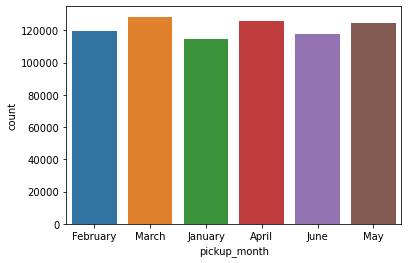

In [36]:
plot1 = sns.countplot(x='pickup_month', data = data)



The above shows that March had the most trip, followed by April and January had the least

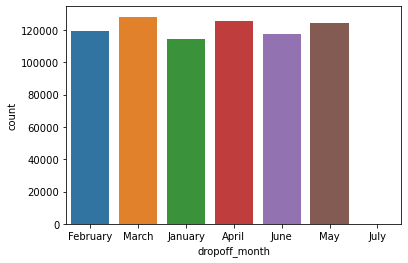

In [37]:
plot2 = sns.countplot(x='dropoff_month', data = data)

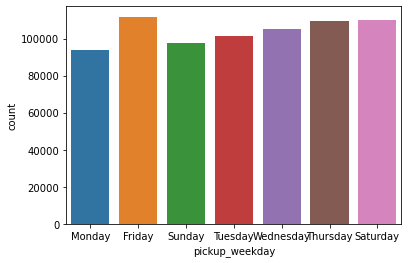

In [38]:
plot3 = sns.countplot(x='pickup_weekday', data = data)

Friday had the most trips, followed by Thursday and Saturday. I am suggesting that more buses or cars should be made available. Also, dynamic pricing (prices of services increasing as a result of traffic) is adviced to generate more revenue for the business. 

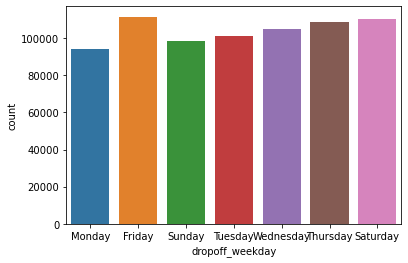

In [39]:
plot4 = sns.countplot(x='dropoff_weekday', data = data)

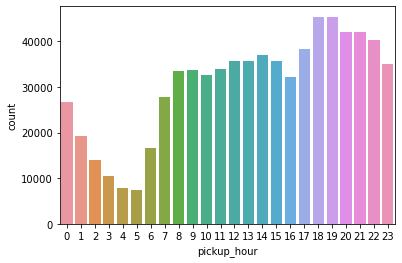

In [40]:
plot5 = sns.countplot(x='pickup_hour', data = data)

The peak of pick up hour is late into the nice, the same adviced above still applies. More vehicles should be made available.

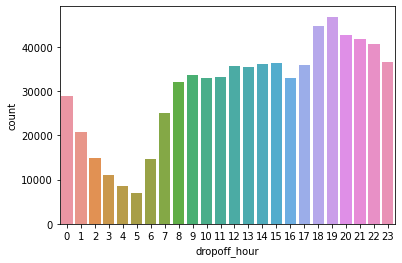

In [41]:
plot6 = sns.countplot(x='dropoff_hour', data = data)

The analysis above shows all the information for the pick up and drop off time are approximately the same, this suggest that the trip duration is not a long one. I will confirm below.

In [42]:
data['trip_duration'].max()/60

32328.933333333334

In [43]:
data['trip_duration'].min()

1

In [44]:
data[(data['trip_duration'] == data['trip_duration'].max())]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_weekday,pickup_month,dropoff_hour,dropoff_weekday,dropoff_month
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736,0,Tuesday,January,11,Wednesday,January


In [45]:
data[(data['trip_duration'] == data['trip_duration'].min())]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_weekday,pickup_month,dropoff_hour,dropoff_weekday,dropoff_month
70318,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1,19,Monday,April,19,Monday,April
95823,id2943073,2,2016-01-03 16:55:44,2016-01-03 16:55:45,1,-73.975677,40.785488,-73.976372,40.785831,N,1,16,Sunday,January,16,Sunday,January
102646,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,N,1,11,Sunday,April,11,Sunday,April
119181,id2517984,1,2016-01-09 00:28:55,2016-01-09 00:28:56,1,-73.861961,40.768559,-73.861961,40.768559,N,1,0,Saturday,January,0,Saturday,January
296874,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,N,1,9,Tuesday,May,9,Tuesday,May
312992,id0075470,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.980690,40.744419,-73.980690,40.744419,N,1,16,Monday,March,16,Monday,March
323299,id0578509,1,2016-02-03 12:35:22,2016-02-03 12:35:23,1,-73.980560,40.754829,-73.980560,40.754829,N,1,12,Wednesday,February,12,Wednesday,February
398887,id2402793,1,2016-04-30 00:28:45,2016-04-30 00:28:46,1,-73.789658,40.647003,-73.789658,40.647003,N,1,0,Saturday,April,0,Saturday,April
512833,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,N,1,12,Sunday,March,12,Sunday,March
533760,id0948644,2,2016-02-22 00:40:25,2016-02-22 00:40:26,0,-73.987595,40.719997,-73.987595,40.720005,N,1,0,Monday,February,0,Monday,February


Hmmmm, since the trip duration is in seconds, the data is saying that there are trips that lasted for just 1 second, are they cancealled trip? This will require further investigation.

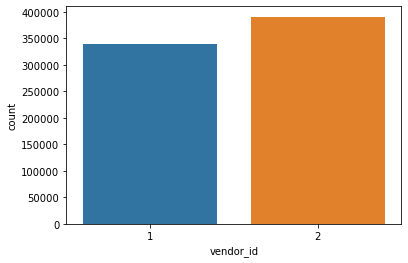

In [46]:
plot7 = sns.countplot(x='vendor_id', data = data)

The above graph shows that the vendor id 2 tops for providers associated with the trip record

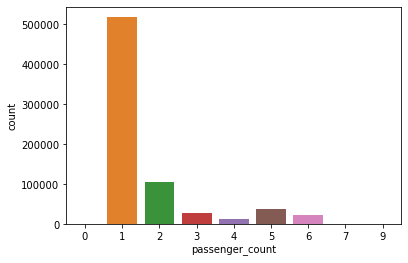

In [47]:
plot8 = sns.countplot(x='passenger_count', data = data)

The above shows that most of the trip had single passengers and the highest number of passenger in all the trip is 9 which very minimal.

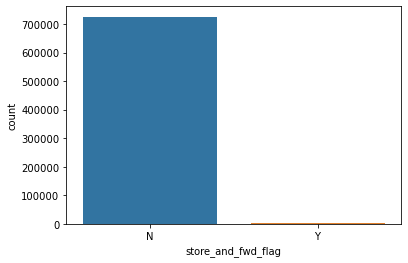

In [48]:
plot9 = sns.countplot(x='store_and_fwd_flag', data = data)

The above visual shows that majority of the trip was not a store and forward trip

Now, I will do an exploration on multiple columns to see relationships

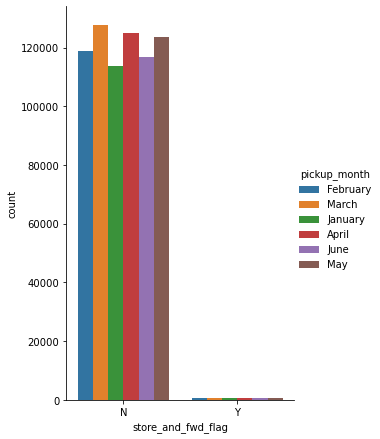

In [49]:
plot10 = sns.catplot(x="store_and_fwd_flag", hue="pickup_month", data=data, kind="count",height=6, aspect=.7)

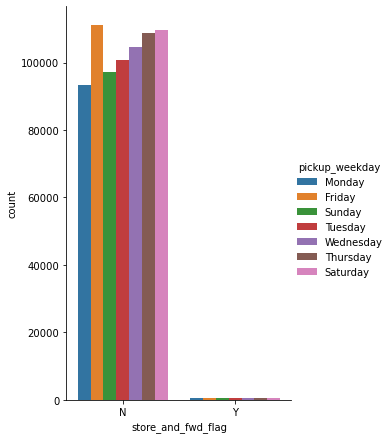

In [50]:
plot10 = sns.catplot(x="store_and_fwd_flag", hue="pickup_weekday", data=data, kind="count",height=6, aspect=.7)

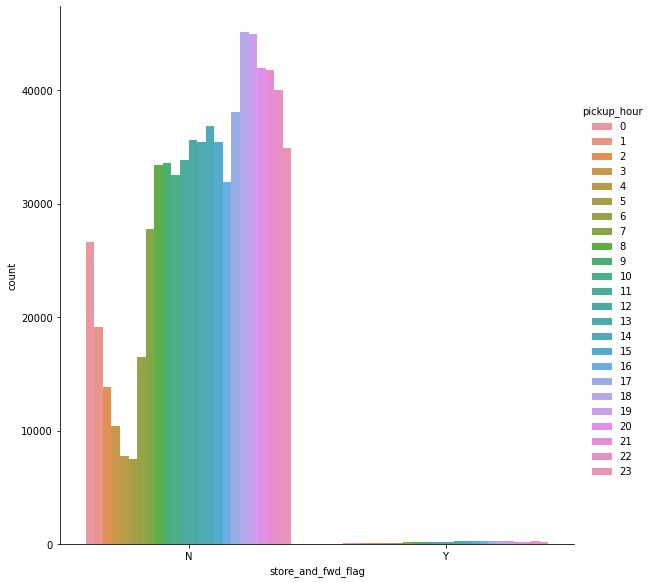

In [51]:
plot11 = sns.catplot(x="store_and_fwd_flag", hue="pickup_hour", data=data, kind="count",height=8)

Since I have already justified that there are similarities in the above visualization for both pick up time and drop off time, there is no point exploring the above for drop off time, same information applies. I will just go ahed to do the same for vendor id

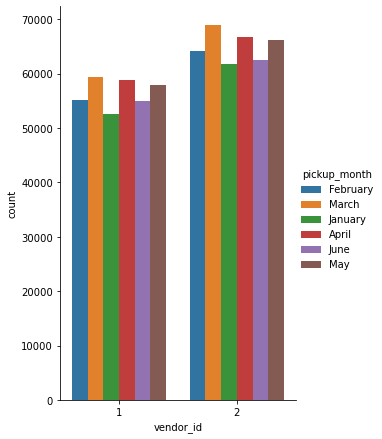

In [52]:
plot12 = sns.catplot(x="vendor_id", hue="pickup_month", data=data, kind="count",height=6, aspect=.7)

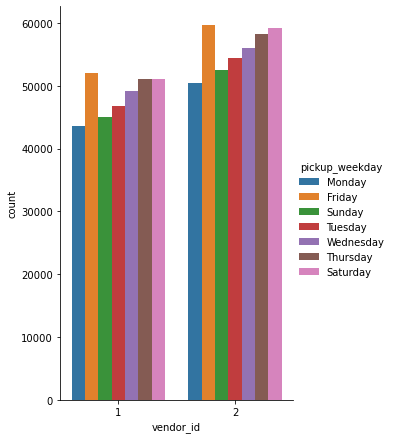

In [53]:
plot13 = sns.catplot(x="vendor_id", hue="pickup_weekday", data=data, kind="count",height=6, aspect=.7)

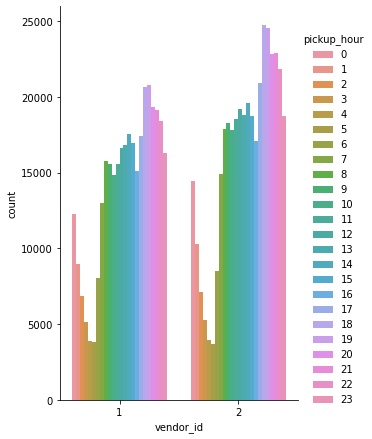

In [54]:
plot14 = sns.catplot(x="vendor_id", hue="pickup_hour", data=data, kind="count",height=6, aspect=.7)

Consequently, let's do same with passenger count

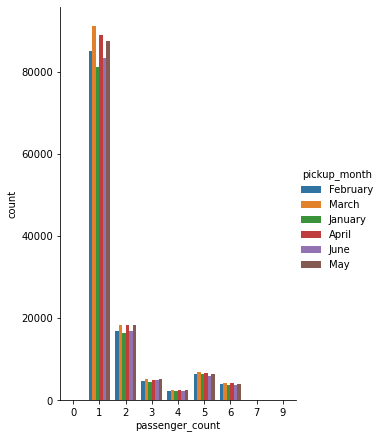

In [55]:
plot15 = sns.catplot(x="passenger_count", hue="pickup_month", data=data, kind="count",height=6, aspect=.7)

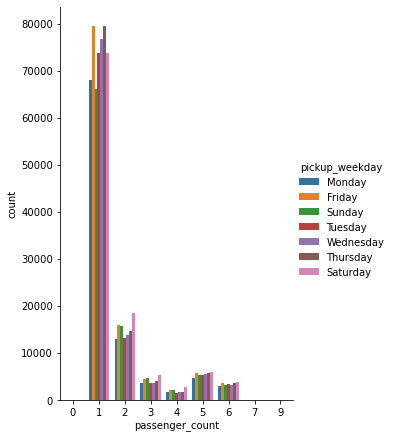

In [56]:
plot16 = sns.catplot(x="passenger_count", hue="pickup_weekday", data=data, kind="count",height=6, aspect=.7)

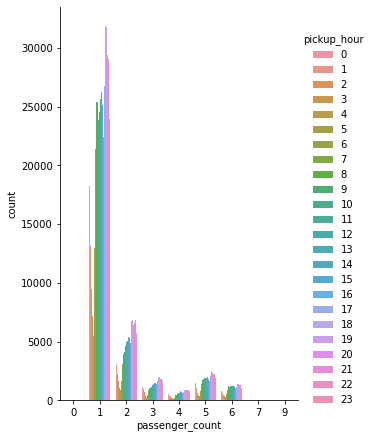

In [57]:
plot17 = sns.catplot(x="passenger_count", hue="pickup_hour", data=data, kind="count",height=6, aspect=.7)